# Grupo Bimbo Products - 2015

This project is aimed at exploring and analysing the inventory of [Grupo Bimbo](https://grupobimbo.com/en). Grupo Bimbo is a Mexican multinational bakery product manufacturing company headquartered in Mexico City. It is the world's largest bakery company. Bimbo has a manufacturing and distribution network in 33 countries throughout America, Asia, Europe and Africa.

The dataset was obtained from [Kaggle](https://www.kaggle.com/c/grupo-bimbo-inventory-demand/data) and it is from 2015. I used some of code to analyse these datasets from [here](https://www.kaggle.com/vykhand/exploring-products).

The dataset consists of 9 weeks of sales transactions in Mexico. Every week, there are delivery trucks that deliver products to the vendors. Each transaction consists of sales and returns. Returns are the products that are unsold and expired. The demand for a product in a certain week is defined as the sales this week subtracted by the return next week.

As a data analyst, there are numerous ways to explore and analyse the data. Exploring gives you a sense of the characteristics of data so you can start understanding how it is distributed and organized. Exploring the data also triggers hypothesis formulation. Until we properly analyse the data, we can either accept or reject the null hypothesis and keep on formulating deeper hypothesis.

How to start and exploring and analysing the data? Start with curiosity and 'answer' your curiosity by asking questions.

For the purpose of this project, we will not analyse the sales data, but rather analyse the products being sold and to where. With this in mind, we can ask questions like:

1. What is the most sold product by Grupo Bimbo?
2. Which state receives the most Bimbo products?

For those of you looking to learn data analysis. This project focuses on **data extraction using regex**, **data aggregation using .groupby**, **plotting using seaborn** and **merging data with .merge**.


**File descriptions:**

* `train.csv` — the training set
* `test.csv` — the test set
* `sample_submission.csv` — a sample submission file in the correct format
* `cliente_tabla.csv` — client names (can be joined with train/test on Cliente_ID)
* `producto_tabla.csv` — product names (can be joined with train/test on Producto_ID)
* `town_state.csv` — town and state (can be joined with train/test on Agencia_ID)

**Data fields:**
* `Semana` — Week number (From Thursday to Wednesday)
* `Agencia_ID` — Sales Depot ID
* `Canal_ID` — Sales Channel ID
* `Ruta_SAK` — Route ID (Several routes = Sales Depot)
* `Cliente_ID` — Client ID
* `NombreCliente` — Client name
* `Producto_ID` — Product ID
* `NombreProducto` — Product Name
* `Venta_uni_hoy` — Sales unit this week (integer)
* `Venta_hoy` — Sales this week (unit: pesos)
* `Dev_uni_proxima` — Returns unit next week (integer)
* `Dev_proxima` — Returns next week (unit: pesos)
* `Demanda_uni_equil` — Adjusted Demand (integer) (This is the target you will predict)

#### In summary, based on the results of this data analysis:

1. Pan Blanco is Grupo Bimbo's most sold product. At least in 2015.
    
    * I am not surprised, I mean look at Grupo Bimbo's mascot, *Osito Bimbo*, which is mainly associated with the Pan Blanco product
    <img src=https://popicon.life/wp-content/uploads/2017/11/169bimbo.jpg width='300'/>
    * Here are som [fun facts](https://www.advertisingweek360.com/5-facts-never-knew-osito-bimbo-bear/#:~:text=This%20is%20Osito%2C%20the%20Bimbo,Bimbo%20and%20Bimbo%20Bakeries%20USA.) about our beloved *Osito Bimbo*.


2. Estado de México is the state that distributes the most Bimbo products.

Additionaly, we also found out that:

Most of Grupo Bimbo's clients are small, independently owned stores called 'tienditas' and they would be very similar to your corner store. 

For ESTADO DE MÉXICO, the agency `AG. MEGA NAUCALPAN` receives the most BIMBO products

### Exploring and Analyzing Products from `producto_tabla.csv`

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500) # display a maximum of 500 rows. This will override a .head(600) for example.
pd.set_option('display.max_columns', 500) # display a maximum of 500 columsn

products = pd.read_csv('C:\\Users\\jorge\\DataScience\\Grupo Bimbo Inventory Demand\\producto_tabla.csv')

In [2]:
products

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72
...,...,...
2587,49992,Tostado Integral 180g MTA WON 49992
2588,49993,Tostado Integral 180g TAB WON 49993
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996


In [3]:
# Rename the columns and assign back to the original dataframe

products = products.rename(columns={'NombreProducto':'product_name'})

In [4]:
products

,Producto_ID,product_name
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72
...,...,...
2587,49992,Tostado Integral 180g MTA WON 49992
2588,49993,Tostado Integral 180g TAB WON 49993
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Producto_ID   2592 non-null   int64 
 1   product_name  2592 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


From the cell above:

The `product_name` column is already in string format. This column also contains more information than just the name of the product. This column also contains the weight, brand. It looks like some of the rows in this column also contain the pieces of product (4p, 6p, etc). 

We will extract the product `name`, `brand`, `weight` and `pieces` and append them to the dataset as new columns.

Let's start by extracting the `name` of the product:

***
`^` - *Beginning* - Matches the beginning of the string, or the beginning of a line if the multiline flag (m) is enabled.

***

Capturing Group 1:


(

`\D` - *No digit* - Matches any character that is not a digit character (0-9).

`*`  - *Quantifier* - Match 0 or more of the preceding token.
    
)

***


In [6]:
products['name'] = products['product_name'].str.extract('^(\D*)')

In [7]:
products

,Producto_ID,product_name,name
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO
1,9,Capuccino Moka 750g NES 9,Capuccino Moka
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita
...,...,...,...
2587,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral
2588,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int


We will follow by doing the same when extracting the `weight`:

***
`^` - *Beginning* - Matches the beginning of the string, or the beginning of a line if the multiline flag (m) is enabled.

`.` - *Dot* - Matches any character except line breaks.

`+` - *Quantifier* - Match 1 or more of the preceding token.

`\s` - *Whitespace* - Matches any whitespace characters (spaces, tabs, line breaks).

***   
Capturing Group 1:

(

`\D` - *Not digit* - Matches any character that is not a digit character (0-9).

`+`  - *Quanifier* - Match 1 or more of the preceding token.

)

***
` ` - *Character* - Matches a SPACE character.

`\d` - *Digit* - Matches any digit character.

`+`  - *Quantifier* - Match 1 or more of the preceding token.

`$`  - *End* - Matches the end of the string, or the end of a line if the multiline flag (m) is enabled.

***

In [8]:
products['brand'] = products['product_name'].str.extract('^.+\s(\D+) \d+$')

Same when extracting the `weight`

***
Capturing Group 1:

(

`\d` - *Digit* - Matches any digit character (0-9).

`+` - *Quantifier* - Match 1 or more preceding token.
    
)

***
Capturing Group 2:

(

`K`  - *Character* - Matches a 'K' character. Case sensitive.

`g` - *Character* - Matches a 'g' character. Case sensitive.

`|` - *Alternation* - Acts like a boolean OR. Matches the expression before or after the |.

`g` - *Character* - Matches a 'g' character. Case sensitive.
    
)
***

In [9]:
w = products['product_name'].str.extract('(\d+)(Kg|g)')

In [10]:
products['weight'] = w[0].astype('float')*w[1].map({'Kg':1000, 'g':1})

And lastly the `pieces`:
***
Capturing Group 1:

(

`\d` - *Digit*- Matches any digit character (0-9).

`+` - *Quantifier* - Match 1 or more preceding token.
    
)
***

`p` - *Character* - Matches a 'p' character. Case sensitive.

` ` - *Character* - Matches a SPACE character.

`'` - *Character* - Matches a '' character.
***

In [11]:
products['pieces'] = products['product_name'].str.extract('(\d+)p ').astype(float)
products.head()

,Producto_ID,product_name,name,brand,weight,pieces
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0


Now that we have extracted the information we want let's explore, analyse and visualize the data that this data set can give us.

In [12]:
products['count_name'] = products['name'].map(products['name'].value_counts(dropna=False))

In [13]:
products

,Producto_ID,product_name,name,brand,weight,pieces,count_name
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN,1
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN,1
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0,3
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN,2
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0,8
...,...,...,...,...,...,...,...
2587,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral,WON,180.0,NaN,11
2588,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral,WON,180.0,NaN,11
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int,WON,200.0,NaN,5
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int,WON,200.0,NaN,5


In [14]:
products.notnull().count()

Producto_ID     2592
product_name    2592
name            2592
brand           2592
weight          2592
pieces          2592
count_name      2592
dtype: int64

In [15]:
most_products = products.sort_values(by='count_name', ascending=False)

In [16]:
most_products

,Producto_ID,product_name,name,brand,weight,pieces,count_name
2151,43231,Pan Blanco 640g MTA BIM 43231,Pan Blanco,BIM,640.0,NaN,39
2545,49443,Pan Blanco 454g MTA SUN 49443,Pan Blanco,SUN,454.0,NaN,39
2337,46143,Pan Blanco 460g TAB BIM 46143,Pan Blanco,BIM,460.0,NaN,39
2050,43052,Pan Blanco 567g MTA SUN 43052,Pan Blanco,SUN,567.0,NaN,39
2339,46149,Pan Blanco 640g TAB BIM 46149,Pan Blanco,BIM,640.0,NaN,39
...,...,...,...,...,...,...,...
1582,36320,Plativolos MG 10p 92g CR1 MLA 36320,Plativolos MG,MLA,92.0,10.0,1
1583,36321,Polvoron MG 6p 113g CR1 MLA 36321,Polvoron MG,MLA,113.0,6.0,1
1584,36322,Principe MG 10p 106g Prom CR1 MLA 36322,Principe MG,MLA,106.0,10.0,1
1585,36323,Principe Cho Bco MG 10p110g Prom CR1 MLA 36323,Principe Cho Bco MG,MLA,110.0,NaN,1


In [17]:
products

,Producto_ID,product_name,name,brand,weight,pieces,count_name
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN,1
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN,1
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0,3
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN,2
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0,8
...,...,...,...,...,...,...,...
2587,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral,WON,180.0,NaN,11
2588,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral,WON,180.0,NaN,11
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int,WON,200.0,NaN,5
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int,WON,200.0,NaN,5


In [18]:
most_products = products.groupby(['name', 'count_name']).sum().sort_values(by='count_name')

In [19]:
most_products = most_products.reset_index()

In [20]:
most_products = most_products[['name', 'count_name']].sort_values(by='count_name', ascending=False)
most_products.head(25)

,name,count_name
1013,Pan Blanco,39
1012,Tortillinas,37
1011,Deliciosas Vainilla,35
1010,Medias Noches,25
1009,Wonder,22
1008,Pan Integral,19
1007,Canelitas,17
1006,Suavicremas Chocolate,17
1005,Deliciosas Chochitos,17
1004,Suavicremas Vainilla,17


In [21]:
most_name = products.groupby(['name', 'count_name']).sum().sort_values(by='count_name', ascending=False)

In [22]:
most_name.head(25)

,,Producto_ID,weight,pieces
name,count_name,,,
Pan Blanco,39,1166536,26291.0,0.0
Tortillinas,37,1397016,106790.0,676.0
Deliciosas Vainilla,35,1201244,6768.0,0.0
Medias Noches,25,792849,13025.0,286.0
Wonder,22,717837,14914.0,0.0
Pan Integral,19,619222,10430.0,0.0
Canelitas,17,539373,3125.0,94.0
Suavicremas Vainilla,17,563225,2640.0,0.0
Suavicremas Chocolate,17,563140,2640.0,0.0


In [23]:
most_name = most_name.head(20).reset_index()

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Product Name')]

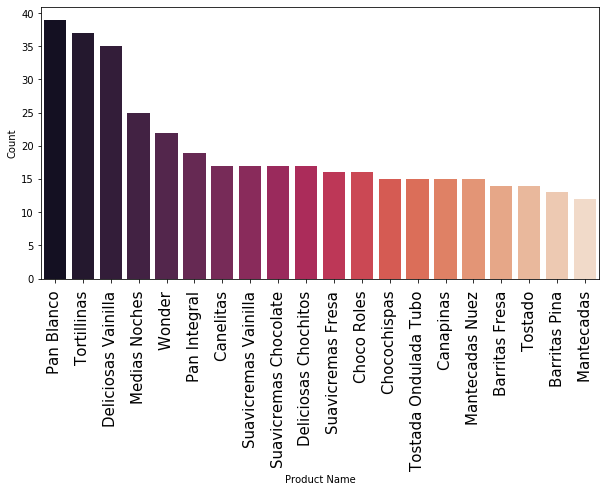

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
chart = sns.barplot(x='name', y='count_name', data=most_name, palette='rocket')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, size=15)
chart.set(xlabel='Product Name', ylabel='Count')

From the data above, we can conclude that *Pan Blanco* is Grupo Bimbo's most sold product. At least in 2015.

### Exploring Data from `train.csv`

In [25]:
train = pd.read_csv('C:\\Users\\jorge\\DataScience\\Grupo Bimbo Inventory Demand\\train.csv')

In [26]:
train.head(25)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
5,3,1110,7,3301,15766,1250,5,38.20,0,0.0,5
6,3,1110,7,3301,15766,1309,3,20.28,0,0.0,3
7,3,1110,7,3301,15766,3894,6,56.10,0,0.0,6
8,3,1110,7,3301,15766,4085,4,24.60,0,0.0,4
9,3,1110,7,3301,15766,5310,6,31.68,0,0.0,6


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74180464 entries, 0 to 74180463
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Semana             int64  
 1   Agencia_ID         int64  
 2   Canal_ID           int64  
 3   Ruta_SAK           int64  
 4   Cliente_ID         int64  
 5   Producto_ID        int64  
 6   Venta_uni_hoy      int64  
 7   Venta_hoy          float64
 8   Dev_uni_proxima    int64  
 9   Dev_proxima        float64
 10  Demanda_uni_equil  int64  
dtypes: float64(2), int64(9)
memory usage: 6.1 GB


### Exploring Data from `test.csv`

In [28]:
test = pd.read_csv('C:\\Users\\jorge\\DataScience\\Grupo Bimbo Inventory Demand\\test.csv')

In [29]:
test.head(25)

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277
5,5,11,1146,4,6601,1741414,972
6,6,11,2057,1,4507,4659766,1232
7,7,10,1612,1,2837,4414012,35305
8,8,10,1349,1,1223,397854,1240
9,9,11,1461,1,1203,1646915,43203


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999251 entries, 0 to 6999250
Data columns (total 7 columns):
 #   Column       Dtype
---  ------       -----
 0   id           int64
 1   Semana       int64
 2   Agencia_ID   int64
 3   Canal_ID     int64
 4   Ruta_SAK     int64
 5   Cliente_ID   int64
 6   Producto_ID  int64
dtypes: int64(7)
memory usage: 373.8 MB


The `test.csv` dataset is not relevant to us because the `train.csv` dataset has the same information.

### Exploring Data from `cliente_tabla.csv`

In [31]:
clients= pd.read_csv('C:\\Users\\jorge\\DataScience\\Grupo Bimbo Inventory Demand\\cliente_tabla.csv')
clients.head(25)

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT
5,4,SDN SER DE ALIM CUERPO SA CIA DE INT
6,5,LA VAQUITA
7,6,LUPITA
8,7,I M EL GUERO
9,8,MINI SUPER LOS LUPES


In [32]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935362 entries, 0 to 935361
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Cliente_ID     935362 non-null  int64 
 1   NombreCliente  935362 non-null  object
dtypes: int64(1), object(1)
memory usage: 14.3+ MB


In [33]:
most_clients = clients['NombreCliente'].value_counts().sort_values(ascending=False)
most_clients.head(25)

NO IDENTIFICADO    281670
LUPITA               4863
MARY                 3016
LA PASADITA          2426
LA VENTANITA         2267
LA GUADALUPANA       1299
ROSY                 1245
ALEX                 1242
GABY                 1238
LA ESCONDIDA         1216
PATY                 1145
LA ESPERANZA         1139
HERNANDEZ            1129
LA CHIQUITA          1117
DANY                 1082
GARCIA               1062
JUQUILITA            1022
MARTINEZ              987
LA TIENDITA           914
3 HERMANOS            913
DIANA                 894
MI TIENDITA           881
SAN JOSE              851
LA PROVIDENCIA        842
GONZALEZ              825
Name: NombreCliente, dtype: int64

In Mexico, we have 'tienditas' or 'tienda de abarrotes'. These are small, independently owned stores and they would be very similar to your corner store. 

From the series above, we don't see any big names such as Walmart, Mega, or even oxxo (the mexican 7-eleven). So essentially Grupo Bimbo's main customers are small indepently owned corner stores.

### Exploring Data from `town_state.csv`

In [34]:
town_state = pd.read_csv('C:\\Users\\jorge\\DataScience\\Grupo Bimbo Inventory Demand\\town_state.csv')
town_state.head(25)

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."
5,1116,2011 AG. SAN ANTONIO,"MÉXICO, D.F."
6,1117,2001 AG. ATIZAPAN,ESTADO DE MÉXICO
7,1118,2007 AG. LA VILLA,"MÉXICO, D.F."
8,1119,2013 AG. MEGA NAUCALPAN,ESTADO DE MÉXICO
9,1120,2018 AG. TEPALCATES 2,"MÉXICO, D.F."


In [35]:
town_state['municipality'] = town_state['Town'].str.extract(r'(\D+)', expand=False)

In [36]:
town_state['number'] = town_state['Town'].str.extract(r'(\d+)$', expand=False)

In [37]:
import numpy as np
town_state['number'] = town_state['number'].replace({np.nan: ''}).astype(str)

In [38]:
town_state['location'] = town_state['municipality'] + town_state['number']

In [39]:
town_state

,Agencia_ID,Town,State,municipality,number,location
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,,AG. LAGO FILT
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",AG. AZCAPOTZALCO,,AG. AZCAPOTZALCO
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,AG. CUAUTITLAN,,AG. CUAUTITLAN
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,,AG. LAGO FILT
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F.",AG.IZTAPALAPA,2,AG.IZTAPALAPA 2
...,...,...,...,...,...,...
785,25729,2572 TIJUANA EL FLORIDO,BAJA CALIFORNIA NORTE,TIJUANA EL FLORIDO,,TIJUANA EL FLORIDO
786,25739,2573 TIJUANA GATO BRONCO,BAJA CALIFORNIA NORTE,TIJUANA GATO BRONCO,,TIJUANA GATO BRONCO
787,25749,2574 TIJUANA PACIFICO,BAJA CALIFORNIA NORTE,TIJUANA PACIFICO,,TIJUANA PACIFICO
788,25759,2575 TIJUANA ROSARITO,BAJA CALIFORNIA NORTE,TIJUANA ROSARITO,,TIJUANA ROSARITO


In [40]:
town_state['count_State'] = town_state['State'].map(town_state['State'].value_counts(dropna=False)) 

In [41]:
most_state = town_state[['State', 'location']].groupby('State').count().sort_values(by='location', ascending=False)

In [42]:
most_state

,location
State,
ESTADO DE MÉXICO,71
"MÉXICO, D.F.",65
JALISCO,55
VERACRUZ,45
GUANAJUATO,39
SONORA,34
PUEBLA,34
NUEVO LEÓN,34
MICHOACÁN,33


From the data above, Estado de México (State of Mexico) is the state where most of their products are distributed.

To make sure that the data is properly aggregated by state, let's count the number of rows. There should be 32 rows because Mexico has 32 states. However, from the output below, we can see that there are 33 rows and this is because there are two states with the same name; `QUERETARO` and `Queretaro de Arteaga`. I actually didn't know that the state of QUERETARO was formerly Queretaro de Arteaga. You always learn different things from data! 

In [43]:
most_state.reset_index().count()

State       33
location    33
dtype: int64

In [44]:
town_state['count_location'] = town_state['location'].map(town_state['location'].value_counts(dropna=False))

In [45]:
town_state

,Agencia_ID,Town,State,municipality,number,location,count_State,count_location
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,,AG. LAGO FILT,65,4
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",AG. AZCAPOTZALCO,,AG. AZCAPOTZALCO,65,4
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,AG. CUAUTITLAN,,AG. CUAUTITLAN,71,4
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,,AG. LAGO FILT,65,4
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F.",AG.IZTAPALAPA,2,AG.IZTAPALAPA 2,65,6
...,...,...,...,...,...,...,...,...
785,25729,2572 TIJUANA EL FLORIDO,BAJA CALIFORNIA NORTE,TIJUANA EL FLORIDO,,TIJUANA EL FLORIDO,32,2
786,25739,2573 TIJUANA GATO BRONCO,BAJA CALIFORNIA NORTE,TIJUANA GATO BRONCO,,TIJUANA GATO BRONCO,32,6
787,25749,2574 TIJUANA PACIFICO,BAJA CALIFORNIA NORTE,TIJUANA PACIFICO,,TIJUANA PACIFICO,32,4
788,25759,2575 TIJUANA ROSARITO,BAJA CALIFORNIA NORTE,TIJUANA ROSARITO,,TIJUANA ROSARITO,32,1


In [46]:
town_state_grouped = town_state.groupby(['State', 'location']).count()[['count_State', 'count_location']]
town_state_grouped

count_State  \
State                 location                                         
AGUASCALIENTES         AGUASCALIENTES NORTE                        4   
                       AGUASCALIENTES SIGLO XXI                    3   
BAJA CALIFORNIA NORTE  Cruce De Anden Noroeste                     1   
                       ENSENADA II                                 6   
                       MEXICALI PLAZA                              3   
                       MEXICALI PONIENTE                           5   
                       SAN QUINTÍN                                 1   
                       TECATE                                      3   
                       TIJUANA EL FLORIDO                          2   
                       TIJUANA GATO BRONCO                         6   
                       TIJUANA PACIFICO                            4   
                       TIJUANA ROSARITO                            1   
BAJA CALIFORNIA SUR    CD. CONSTITUCION                            2   
                       GUERRERO NEGRO                              2   
                       LA PAZ                                      5   
                       SAN JOSE DEL CABO                           2   
                       SAN LUCAS                                   4   
                       SANTA ROSALIA                               2   
CAMPECHE               CAMPECHE                                    5   
                       CIUDAD DEL CARMEN                           5   
                       ESCARCEGA                                   2   
CHIAPAS                ARRIAGA_BM                                  2   
                       COMITAN                                     2   
                       SAN CRISTOBAL                               2   
                       TAPACHULA                                   4   
                       TUXTLA                                      6   
CHIHUAHUA              CASAS GRANDES                               1   
                       CHIHUAHUA BIMBO                             3   
                       CHIHUAHUA MARINELA                          4   
                       CUAHUTEMOC                                  3   
                       DELICIAS BIMBO                              3   
                       JUAREZ                                      4   
                       JUAREZ BIMBO                                3   
                       OJINAGA                                     2   
                       PARRAL BIMBO                                2   
COAHUILA               ACUÑA                                       3   
                       MONCLOVA BIMBO                              5   
                       PIEDRAS NEGRAS                              4   
                       SABINAS                                     3   
                       SALTILLO BIMBO                              5   
                       SALTILLO MARINELA                           3   
                       TORREON                                     6   
COLIMA                 COLIMA BIMBO                                4   
                       MANZANILLO BIMBO                            4   
                       TECOMAN                                     2   
DURANGO                DURANGO BIMBO                               6   
                       GOMEZ PALACIO BIMBO                         3   
                       NUEVO IDEAL                                 2   
ESTADO DE MÉXICO       AG. ATIZAPAN                                5   
                       AG. COACALCO                                5   
                       AG. CUAUTITLAN                              4   
                       AG. IXTAPALUCA 1                            5   
                       AG. LOS REYES                               3   
                       AG. MEGA NAUCALPAN                          8   
                       AG

The output above, groups the number of distribution centers by state, based on their frequency. 

This means that for ESTADO DE MÉXICO, the `AG. MEGA NAUCALPAN` receives the most BIMBO products.

In [47]:
most_state = town_state_grouped.sort_values(by='count_State', ascending=False)

In [48]:
most_state = town_state_grouped.sort_values(by='count_State', ascending=False)

In [49]:
most_state = most_state.reset_index().head(10)
most_state

,State,location,count_State,count_location
0,ESTADO DE MÉXICO,AG. MEGA NAUCALPAN,8,8
1,VERACRUZ,JALAPA I,7,7
2,"MÉXICO, D.F.",AG. SAN ANTONIO,7,7
3,JALISCO,PUERTO VALLARTA BIMBO,6,6
4,DURANGO,DURANGO BIMBO,6,6
5,COAHUILA,TORREON,6,6
6,GUANAJUATO,IRAPUATO GUADALUPE,6,6
7,TABASCO,RUIZ CORTINEZ,6,6
8,TAMAULIPAS,MATAMOROS BIMBO,6,6
9,CHIAPAS,TUXTLA,6,6


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'State')]

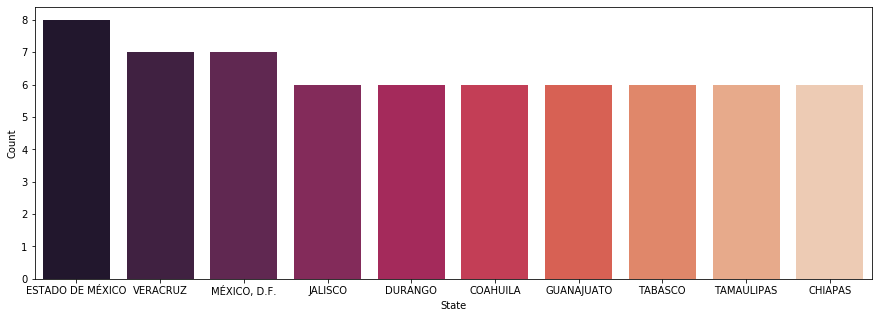

In [50]:
plt.figure(figsize=(15,5))
chart_1 = sns.barplot(x='State', y='count_State', data=most_state, palette='rocket')
chart_1.set_xticklabels(chart_1.get_xticklabels(),size=10)
chart_1.set(xlabel='State', ylabel='Count')

We can see from the data that we can join all these diferent datasets because they have primary keys our columns with common vlues, aka. ids. For example, we can join the `producto_tabla.csv` dataset with the `train./test.csv` datasets using the `[Producto_ID]` column. Similarly, we can join the `cliente_tabla.csv` dataset with `the train./test.csv` datasets using the `[Cliente_ID]` column. Lastly,  we can join the `town_state.csv` dataset with the `train./test.csv` datasets using the `[Agencia_ID]` column.

We will start by selecting the columns that we want to work with. 

Based on the capabilities of average laptops, we will need to set a limit as to the quantity of data we want to work with (500 rows) because the `train.csv`has more than 70 million rows of data that we can join with the previous data that we have analysed. If not, we will get a MemoryError.

In [51]:
product_id = products[['Producto_ID','name','brand','weight','pieces','count_name']].head(500)
town_state_id = town_state[['Agencia_ID','municipality', 'State', 'location', 'count_State', 'count_location']].head(500)
train_id = train[['Agencia_ID','Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID','Venta_uni_hoy', 'Venta_hoy']].head(500)

In [52]:
town_train = pd.merge(left=town_state_id, right=train_id, how='inner', on='Agencia_ID')

In [53]:
town_train.head(25)

,Agencia_ID,municipality,State,location,count_State,count_location,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy
0,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,1212,3,25.14
1,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,1216,4,33.52
2,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,1238,4,39.32
3,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,1240,4,33.52
4,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,1242,3,22.92
5,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,1250,5,38.20
6,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,1309,3,20.28
7,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,3894,6,56.10
8,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,4085,4,24.60
9,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,15766,5310,6,31.68


In [54]:
product_train = pd.merge(left=product_id, right=train_id, how='inner', on='Producto_ID')

In [55]:
product_train.sort_values(by='count_name', ascending=False)

,Producto_ID,name,brand,weight,pieces,count_name,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Venta_uni_hoy,Venta_hoy
200,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,24695,8,159.52
208,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,819816,14,279.16
214,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,4532486,27,538.38
213,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,4328716,2,39.88
212,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,4328602,8,159.52
211,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,2337111,5,99.70
210,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,853124,2,39.88
209,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,819832,2,39.88
201,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,50379,38,757.72
207,2233,Pan Blanco,BIM,640.0,NaN,39,1110,7,3301,818913,17,338.98


In [56]:
product_town = pd.merge(left=product_train, right=town_train, how='outer', on='Producto_ID')

In [57]:
product_town.sort_values(by='count_name', ascending=False)

,Producto_ID,name,brand,weight,pieces,count_name,Agencia_ID_x,Canal_ID_x,Ruta_SAK_x,Cliente_ID_x,Venta_uni_hoy_x,Venta_hoy_x,Agencia_ID_y,municipality,State,location,count_State,count_location,Canal_ID_y,Ruta_SAK_y,Cliente_ID_y,Venta_uni_hoy_y,Venta_hoy_y
2752,2233,Pan Blanco,BIM,640.0,NaN,39.0,1110.0,7.0,3301.0,4328716.0,2.0,39.88,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,325070,8,159.52
2624,2233,Pan Blanco,BIM,640.0,NaN,39.0,1110.0,7.0,3301.0,319974.0,19.0,378.86,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,325070,8,159.52
2589,2233,Pan Blanco,BIM,640.0,NaN,39.0,1110.0,7.0,3301.0,181232.0,10.0,199.40,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,181232,10,199.40
2588,2233,Pan Blanco,BIM,640.0,NaN,39.0,1110.0,7.0,3301.0,181232.0,10.0,199.40,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,108104,265,5284.10
2587,2233,Pan Blanco,BIM,640.0,NaN,39.0,1110.0,7.0,3301.0,181232.0,10.0,199.40,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,50379,38,757.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,35144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,4532486,25,512.50
4310,48077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,819853,30,427.80
4311,35141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,1916494,25,512.50
4312,42869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110,AG. LAGO FILT,"MÉXICO, D.F.",AG. LAGO FILT,65,4,7,3301,2342577,5,19.45


In [58]:
product_town.groupby(['name', 'count_name'])[['name', 'count_name', 'State', 'location']]

In [59]:
product_town[['name', 'count_name', 'State', 'location']].groupby(['name', 'State', 'location']).sum().sort_values(by='count_name', ascending=False)

,,,count_name
name,State,location,
Pan Blanco,"MÉXICO, D.F.",AG. LAGO FILT,9984.0
Pan Integral,"MÉXICO, D.F.",AG. LAGO FILT,8379.0
Barritas Fresa,"MÉXICO, D.F.",AG. LAGO FILT,4536.0
Tortillinas,"MÉXICO, D.F.",AG. LAGO FILT,3700.0
Gansito,"MÉXICO, D.F.",AG. LAGO FILT,3249.0
Roles Canela,"MÉXICO, D.F.",AG. LAGO FILT,2890.0
Principe,"MÉXICO, D.F.",AG. LAGO FILT,2475.0
Barritas Pina,"MÉXICO, D.F.",AG. LAGO FILT,2197.0
Donas Azucar,"MÉXICO, D.F.",AG. LAGO FILT,1805.0


Keep in mind that we just joined our analysed data with 500 data rows an not the complete 70 million data rows. Despite this limitation, we can see that Pan Blanco is still the most sold product (as expected because we already knew this). However, it appears that México, D.F is the state that buys more Pan Banco.

I would not trust this 'conclusion' because we are working with a limited range of data rows. It would be more reasonable to think that Estado de México would the most Pan Blanco because we already know that this is the state that buys more Bimbo products *overall*. Remember, that just because Pan Blanco is the most sold product and Estado de México is the state taht buys more Bimbo products, means that Estado de México buys the most Pan Blanco. For now we can't know.